# How to Approach ML Problems

In [25]:
import matplotlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import opendatasets as od
import numpy as np

%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Download, clean & explore the data and create new features

In [26]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')

In [27]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [28]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [29]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [30]:
# test_df

In [31]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Cleaning Data

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [33]:
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


$Duplicate$ $Rows$

In [34]:
merged_df.duplicated().sum()

np.int64(0)

In [35]:
merged_df.Date.min(), merged_df.Date.max()

('2013-01-01', '2015-07-31')

In [36]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [37]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [38]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [39]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratory Data Analysis and Visualization

<Axes: xlabel='Sales', ylabel='Count'>

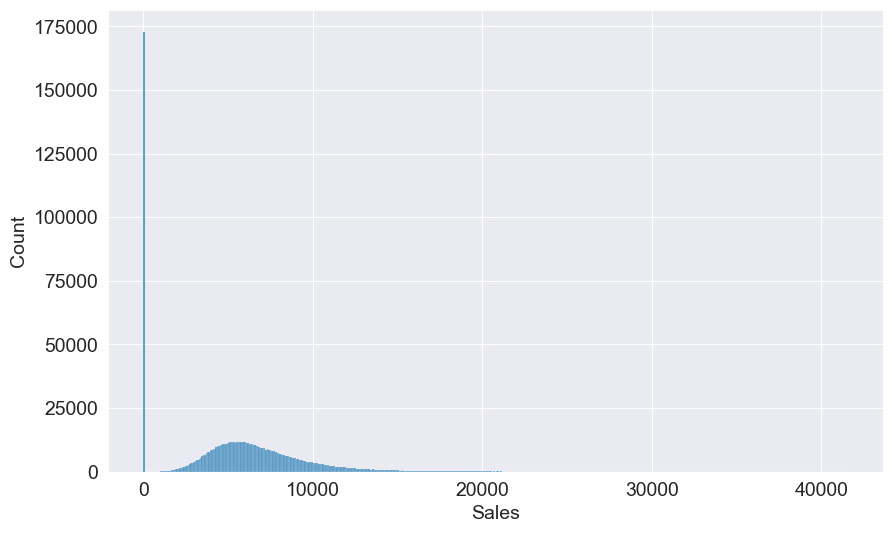

In [40]:
sns.histplot(data=merged_df, x='Sales')

In [41]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [42]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [43]:
merged_df = merged_df[merged_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

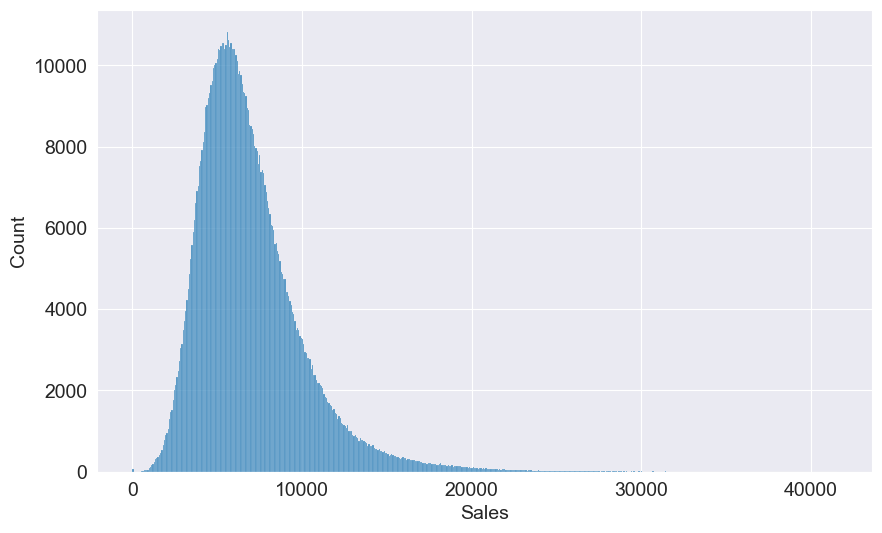

In [44]:
sns.histplot(data=merged_df, x='Sales')

<Axes: xlabel='Sales', ylabel='Customers'>

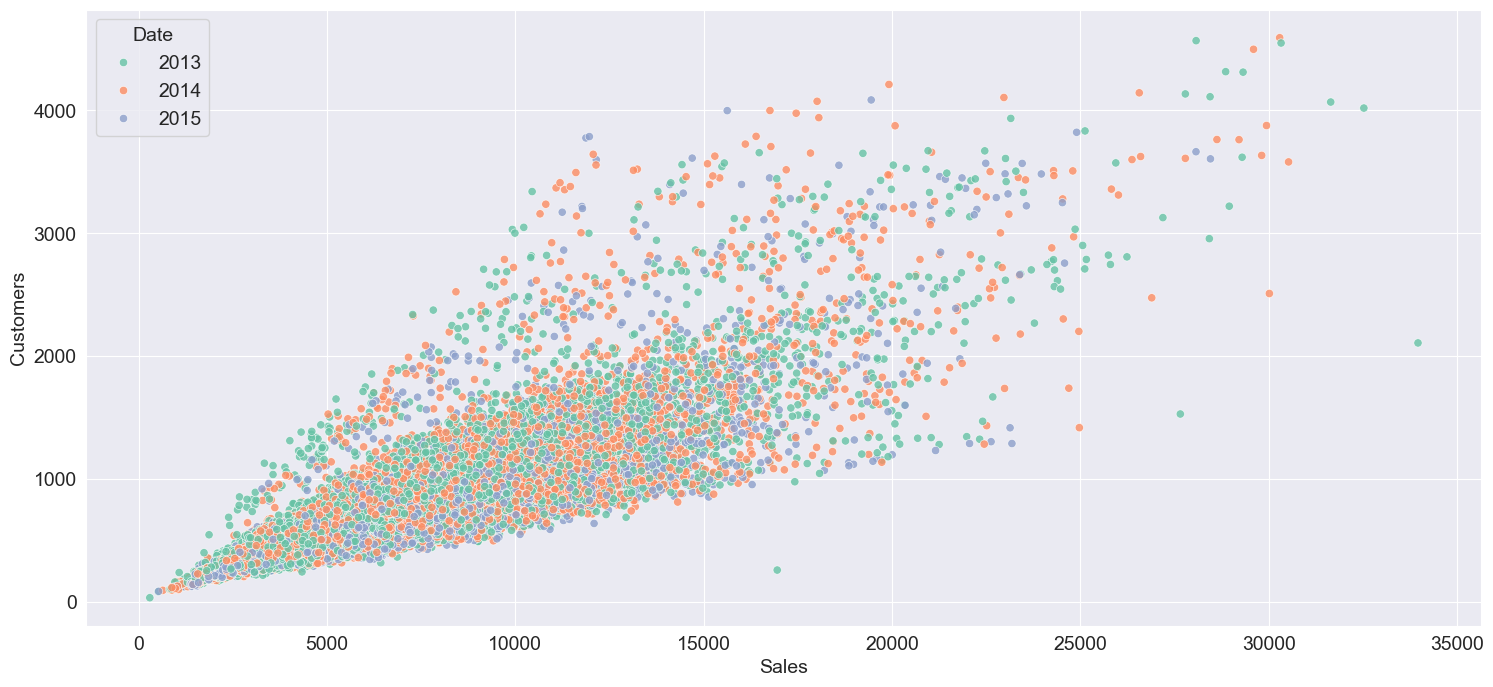

In [45]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(data=temp_df, x='Sales', y='Customers', hue=temp_df.Date.dt.year, alpha=0.8, palette='Set2')

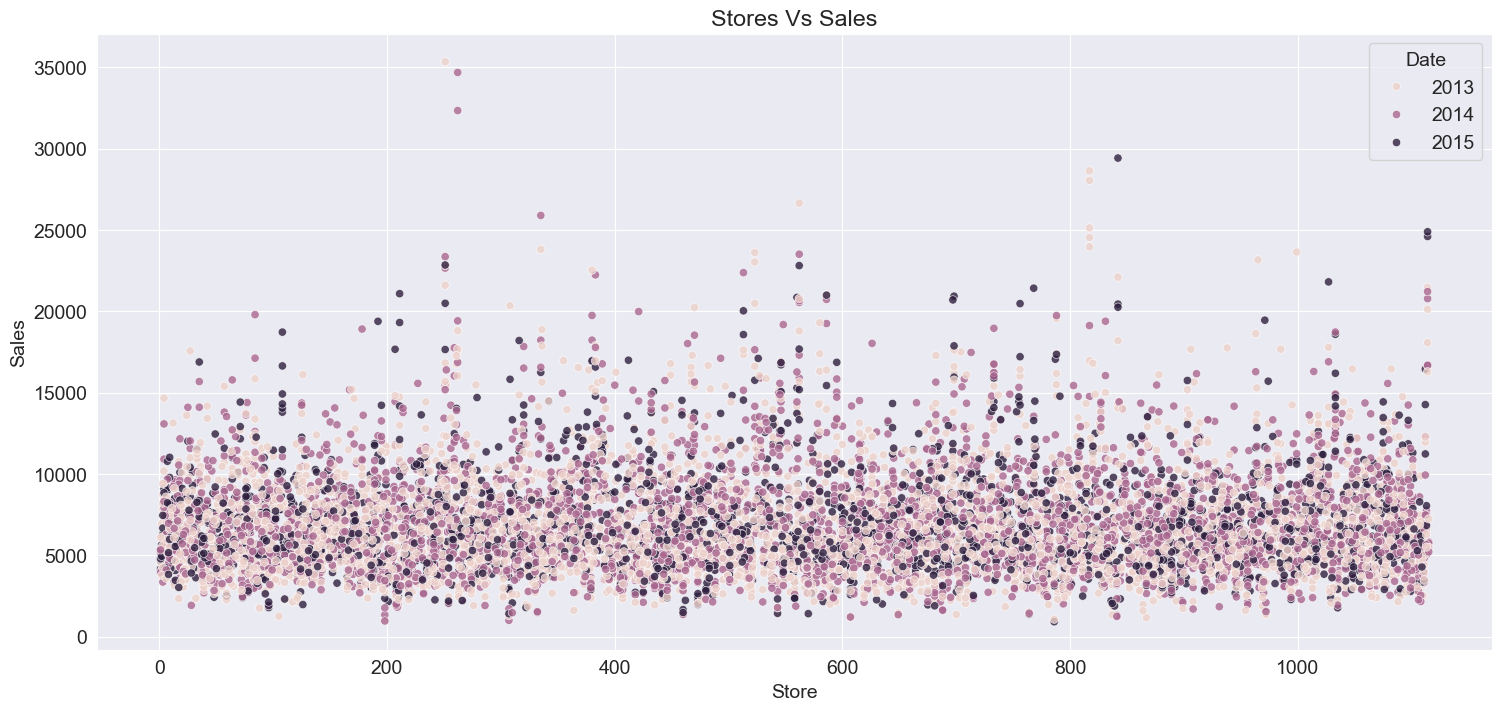

In [46]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

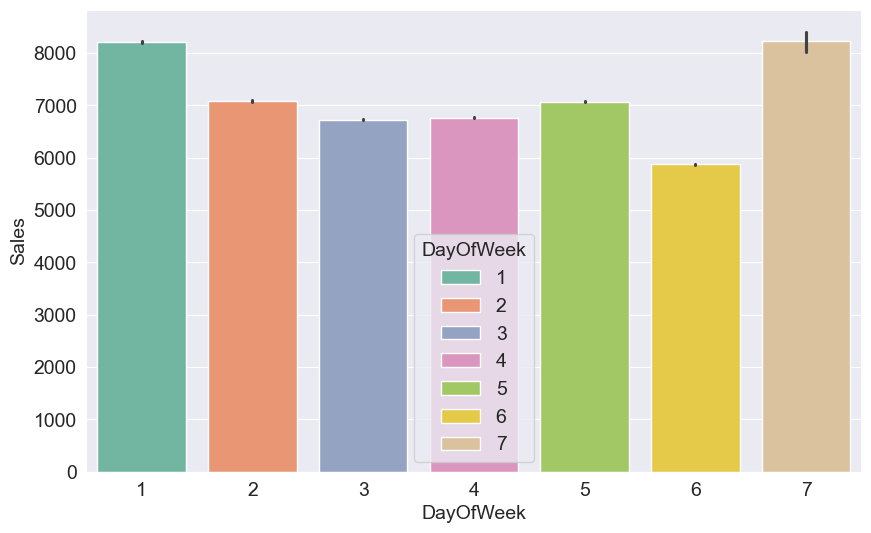

In [47]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales', hue='DayOfWeek', palette='Set2')

<Axes: xlabel='Promo', ylabel='Sales'>

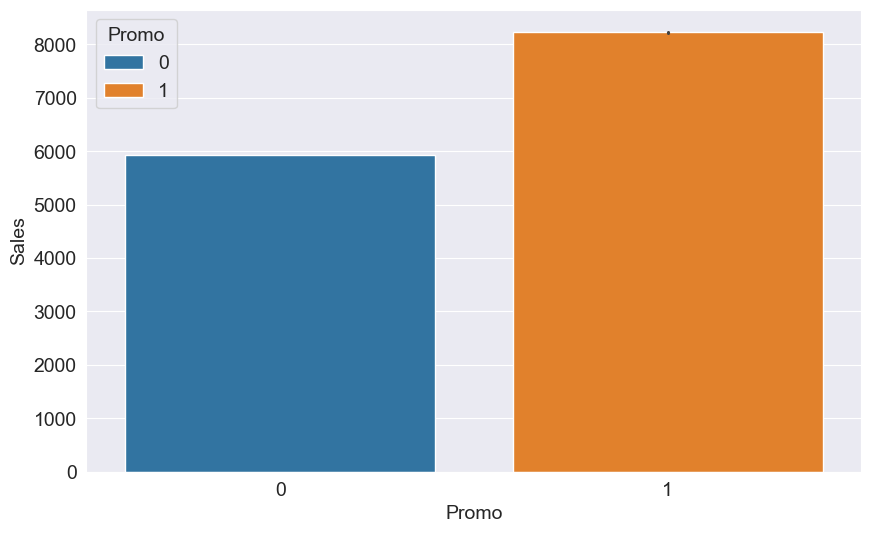

In [48]:
sns.barplot(data=merged_df, x='Promo', y='Sales', hue='Promo')

In [49]:
merged_df.select_dtypes('number').corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

## Feature Engineering

In [50]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

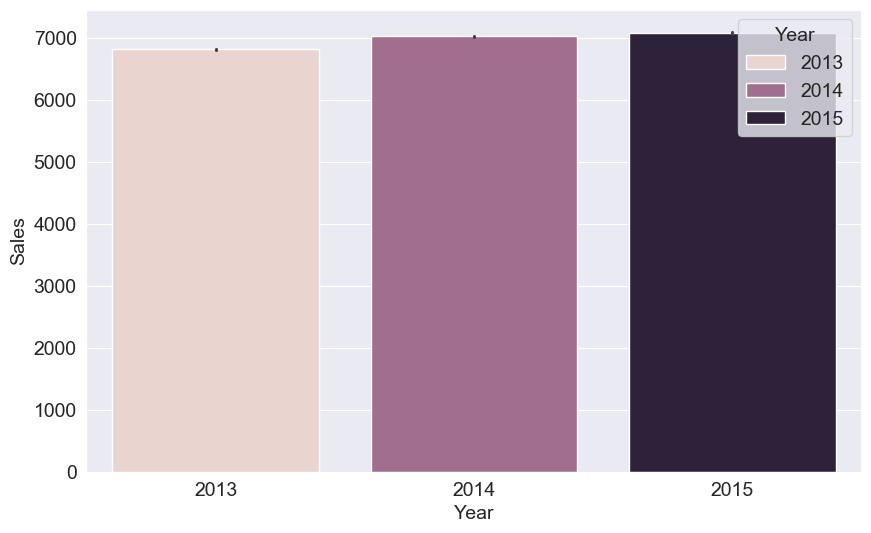

In [51]:
sns.barplot(data=merged_df, x='Year', y='Sales', hue='Year')

<Axes: xlabel='Month', ylabel='Sales'>

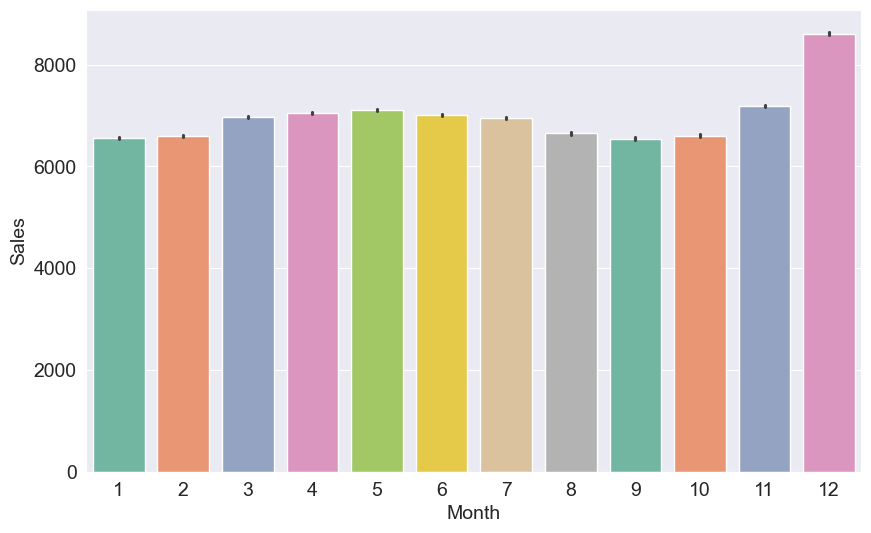

In [52]:
sns.barplot(data=merged_df, x='Month', y='Sales', hue='Month', palette='Set2', legend=False)

<Axes: xlabel='Day', ylabel='Sales'>

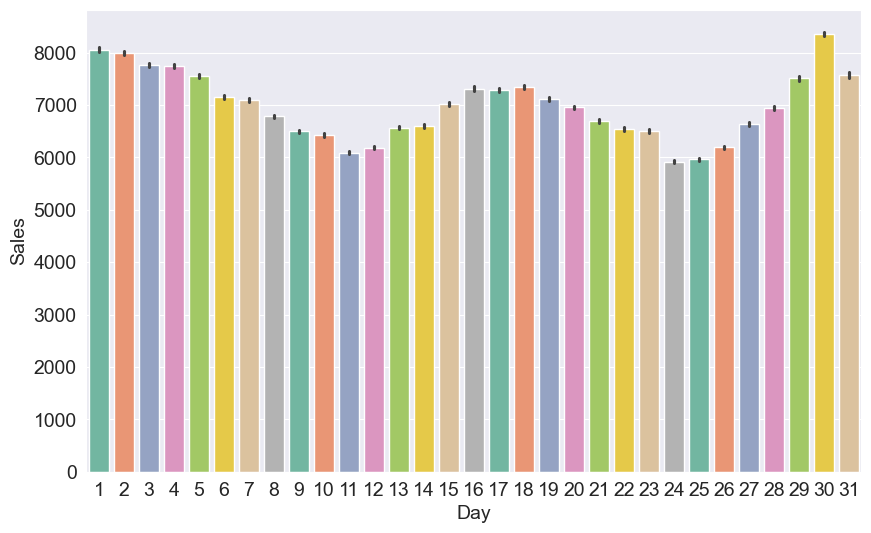

In [53]:
sns.barplot(data=merged_df, x='Day', y='Sales', hue='Day', 
            palette='Set2', legend=False
            )

## Data Preparation

In [54]:
len(merged_df)

844392

In [55]:
train_size = int(0.75 * len(merged_df))
train_size

633294

In [56]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [57]:
len(train_df), len(val_df)

(633294, 211098)

In [58]:
# train_df

In [59]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [60]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

### Input and Target Columns

In [61]:
print(train_df.columns.tolist())

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year']


In [62]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

In [63]:
merged_df[input_cols].nunique()
# merged_df[input_cols].value_counts()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [64]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [65]:
merged_test_df['Year'] = merged_test_df.Date.dt.year
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month

In [66]:
test_inputs = merged_test_df[input_cols].copy()

In [67]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encoding

#### Imputation

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [70]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [71]:
# train_inputs[numeric_cols].value_counts().sum()

#### Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [74]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [75]:
train_inputs[numeric_cols].describe()

,Store,Day,Month,Year
count,633294.000000,633294.000000,633294.000000,633294.000000
mean,0.500437,0.488868,0.478522,0.466373
std,0.288786,0.290426,0.306317,0.498868
min,0.000000,0.000000,0.000000,0.000000
25%,0.251346,0.233333,0.181818,0.000000
50%,0.500000,0.500000,0.454545,0.000000
75%,0.750449,0.733333,0.727273,1.000000
max,1.000000,1.000000,1.000000,1.000000


#### Encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = encoder.get_feature_names_out().tolist()
# print(type(encoded_cols))

In [78]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [79]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [80]:
x_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Create Quick & easy baseline model to benchmark future models

#### Fixed/Random Guess

In [81]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [82]:
train_preds = return_mean(x_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

#### Evaluating using RMSE score

In [83]:
from sklearn.metrics import root_mean_squared_error

In [84]:
root_mean_squared_error(train_preds, train_targets)

3082.450443277419

In [85]:
root_mean_squared_error(return_mean(x_val), val_targets)

3168.6033635047716

In [86]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [87]:
train_preds = guess_random(x_train)
train_preds

array([ 2678.24091281, 36420.23147261, 29252.15959406, ...,
       39493.5896789 , 38742.66459691,  1989.12213634])

In [88]:
root_mean_squared_error(train_preds, train_targets)

18624.1138545531

In [89]:
root_mean_squared_error(guess_random(x_val), val_targets)

18392.849729338886

### Baseline ML model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
linreg = LinearRegression()

In [92]:
linreg.fit(x_train, train_targets)

LinearRegression()

In [93]:
linreg.coef_, linreg.intercept_

(array([ 1.04613988e+02, -1.00014797e+02,  6.50678489e+02,  1.04413753e+02,
         9.88487856e+02, -1.25115344e+02, -3.95828726e+02, -3.97660124e+02,
        -7.18979775e+00, -6.37157355e+01,  1.02187074e+00, -1.13867445e+03,
         1.13867445e+03, -1.23115139e+02, -5.62555847e+01, -3.90512282e+01,
         2.18421952e+02, -1.23677263e+03,  4.17553271e+03, -1.34703585e+03,
        -1.59172423e+03,  9.42626963e+02, -2.61870726e+03,  1.67608030e+03]),
 np.float64(6775.383916573277))

In [94]:
train_preds = linreg.predict(x_train)
train_preds

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099])

In [95]:
root_mean_squared_error(train_preds, train_targets)

2741.5871919165775

In [96]:
root_mean_squared_error(linreg.predict(x_val), val_targets)

2817.7797940117125

## Pick a strategy, train a model & tune hyperparameters

In [102]:
def try_model(model):
    # Fit the model
    model.fit(x_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    
    # Compute RMSE
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse, val_rmse

#### Linear Model

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [103]:
try_model(LinearRegression())

(2741.5871919165775, 2817.7797940117125)

In [104]:
try_model(Ridge())

(2741.587195081445, 2817.7784665409863)

In [105]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [106]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [107]:
try_model(SGDRegressor())

(2741.7928055593347, 2817.047324800997)

#### Tree Based Models

##### DecisionTreeRegressor

In [108]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [110]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

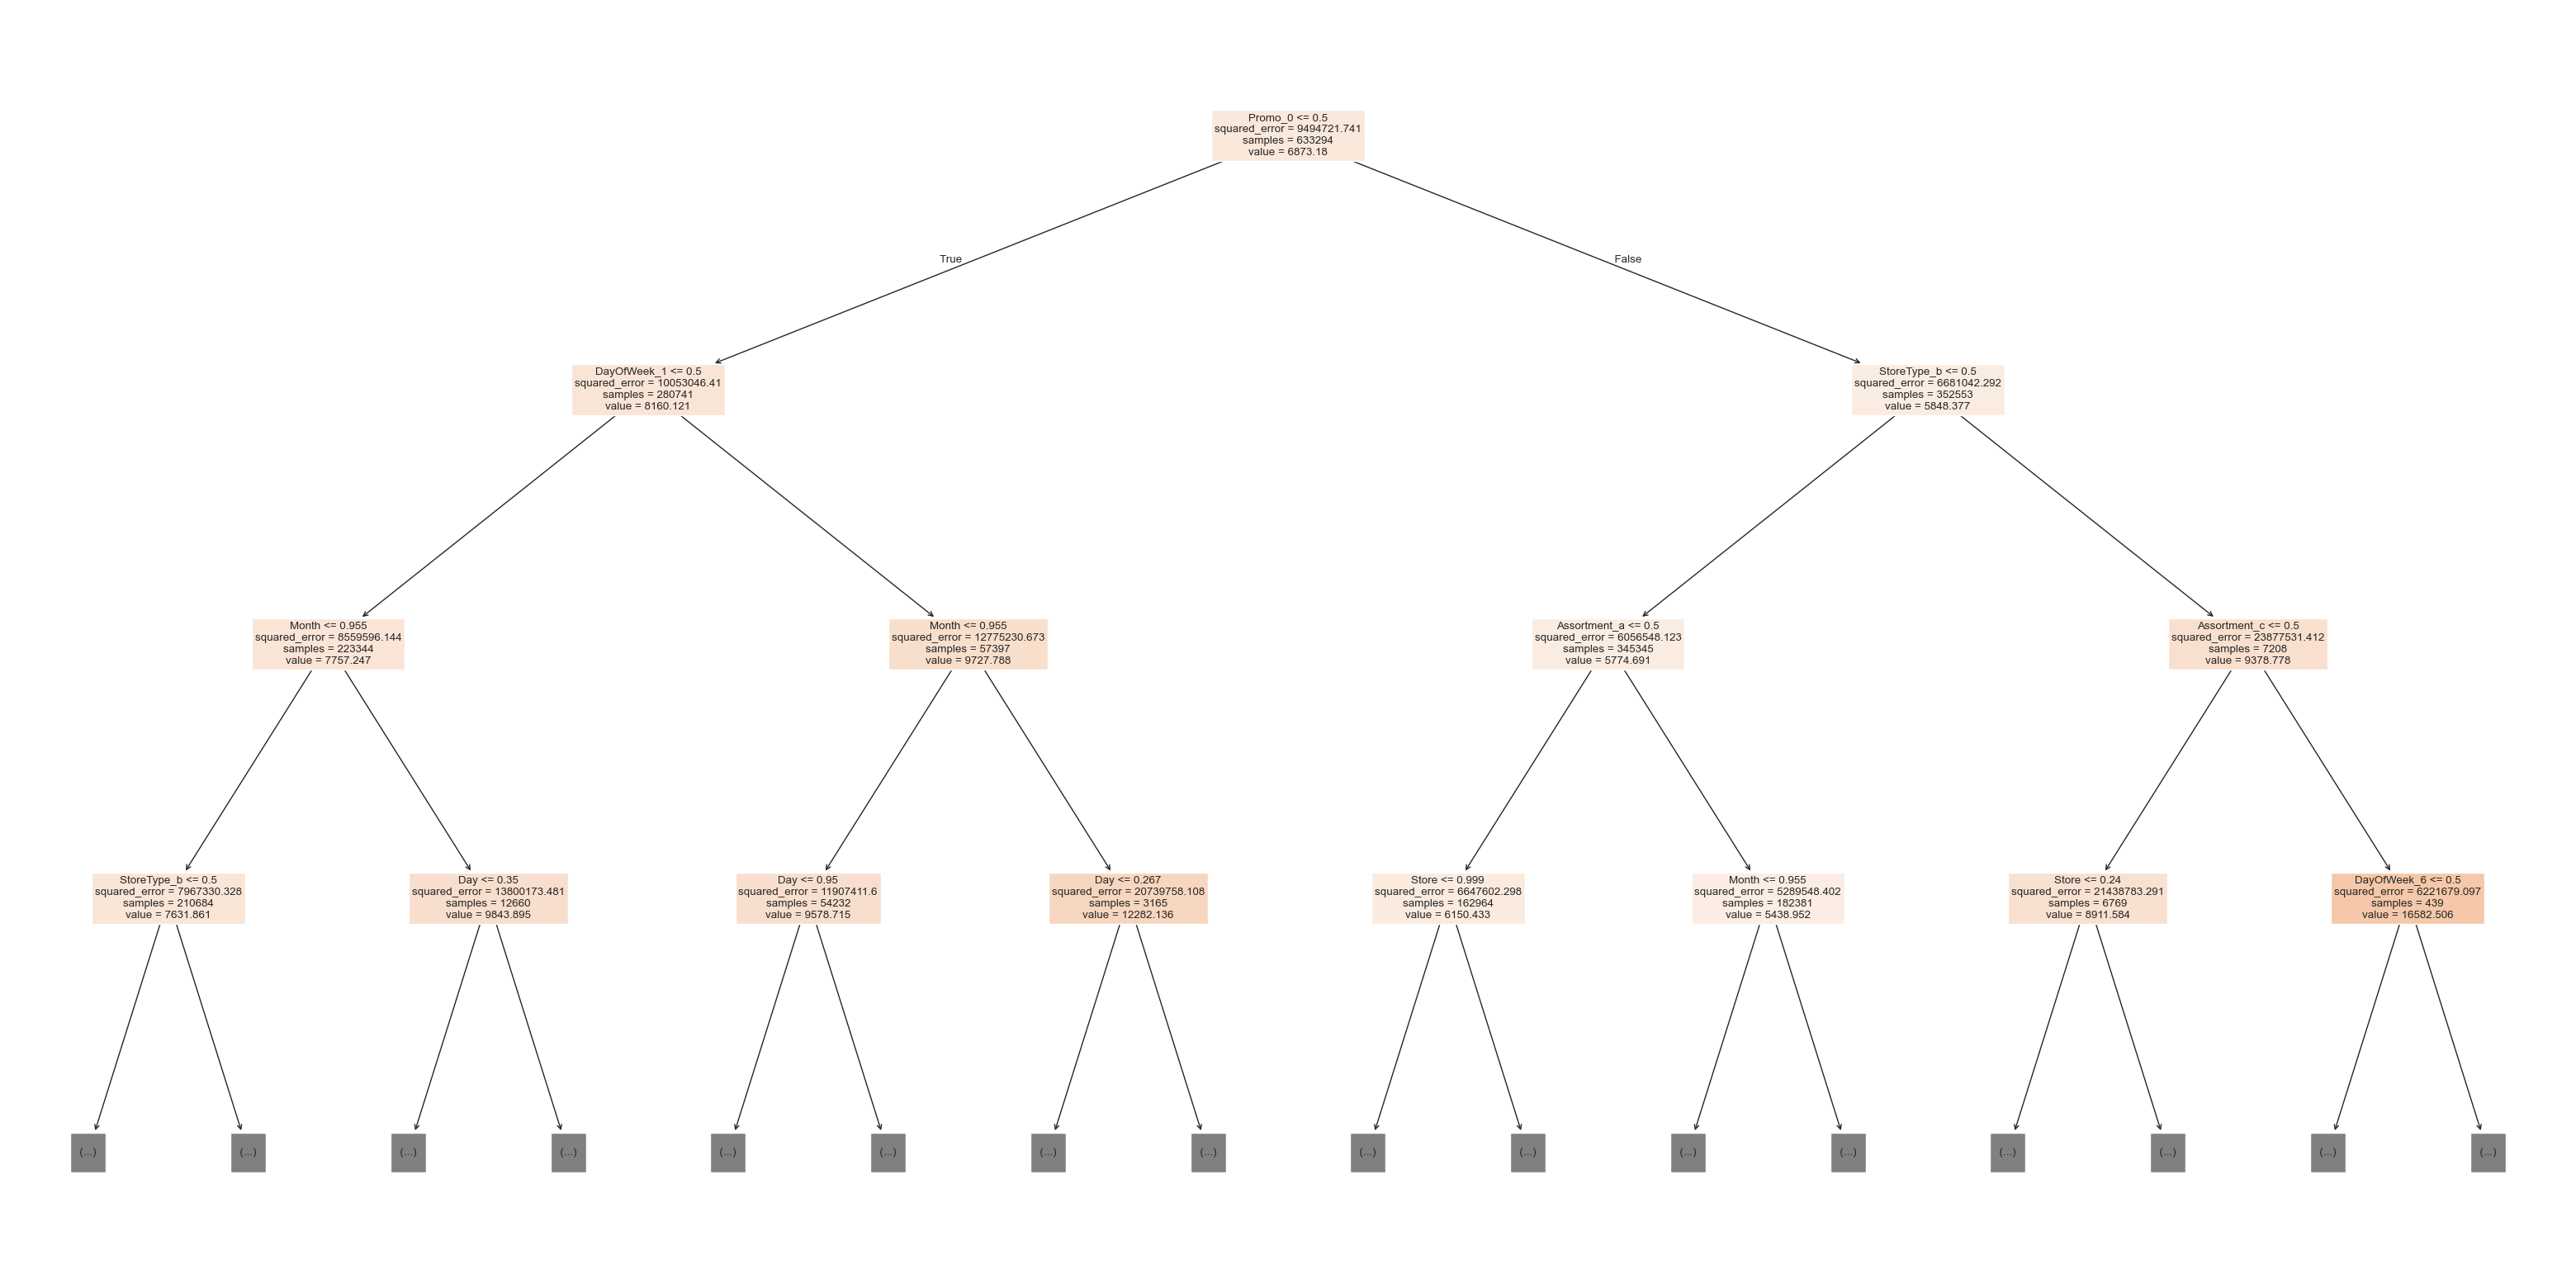

In [111]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

##### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

(474.9198974666898, 1371.7321923469985)

In [120]:
# plot_tree(rf, max_depth=3, filled=True )

## Interpret models, study individual predictions & present your findings

### Feature Importance

In [121]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [124]:
importance_df = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


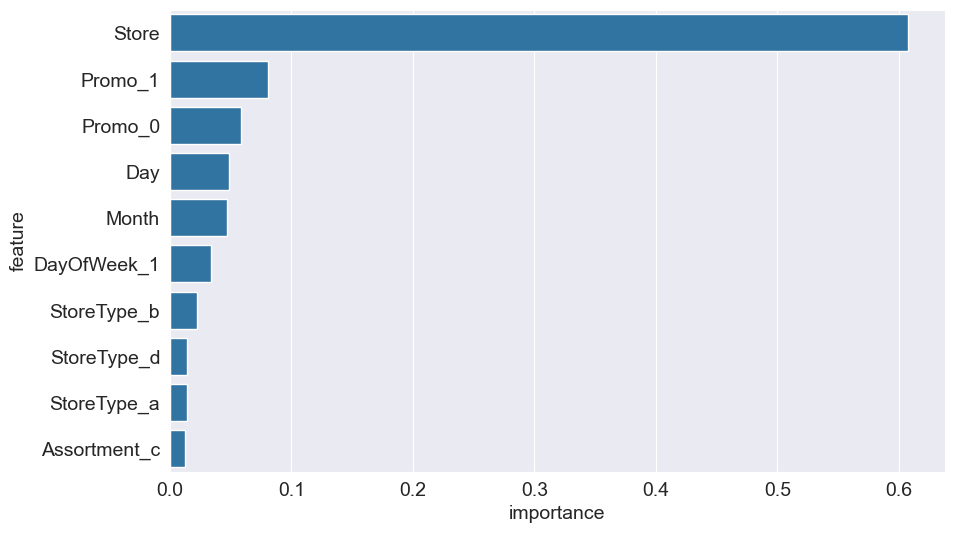

In [125]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Looking at individual predictions

In [126]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [ ]:
sample_input = {
 'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan
}

# sample_input

In [128]:
predict_input(rf, sample_input)

np.float64(4258.01)

In [130]:
test_preds = rf.predict(x_test)
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

### Making a submission on Kaggle

In [131]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [132]:
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')

In [133]:
submission_df.fillna(0, inplace=True)

In [134]:
submission_df.to_csv('submission.csv', index=None)

In [135]:
submission_df

,Id,Sales
0,1,4258.01
1,2,7713.83
2,3,8775.70
3,4,6775.37
4,5,6492.47
...,...,...
41083,41084,3052.40
41084,41085,9008.27
41085,41086,5954.68
41086,41087,20823.07
